In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [0]:
iris = pd.read_csv("Iris.csv")
iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [0]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [0]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Exploratory Analysis - Visualization

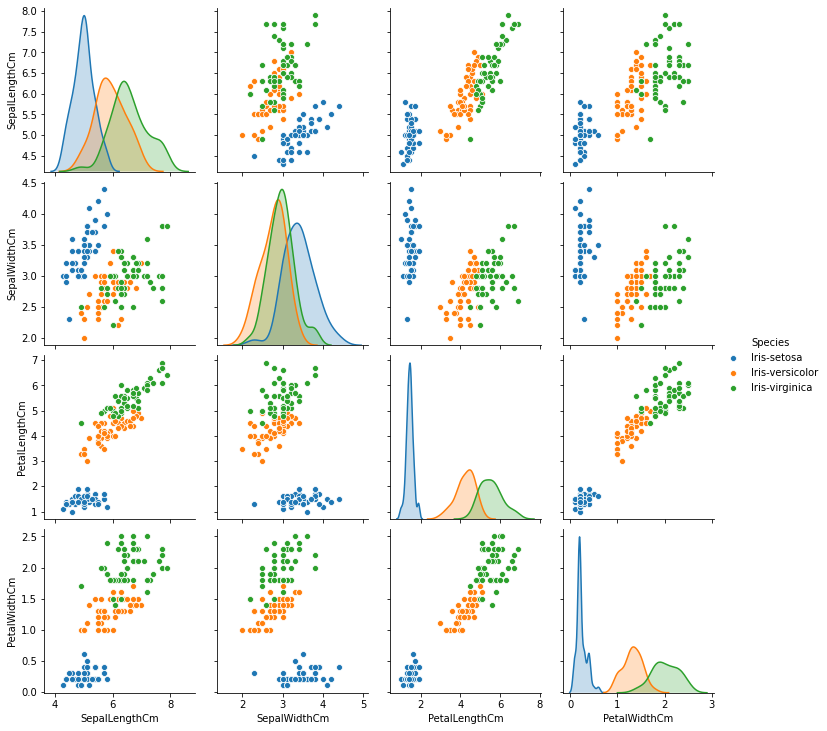

In [0]:
sns.pairplot(data=iris[iris.columns[1:6]], hue='Species')
plt.show()

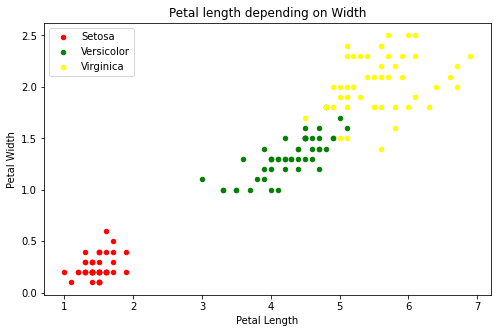

In [0]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='yellow', label='Virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal length depending on Width")
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

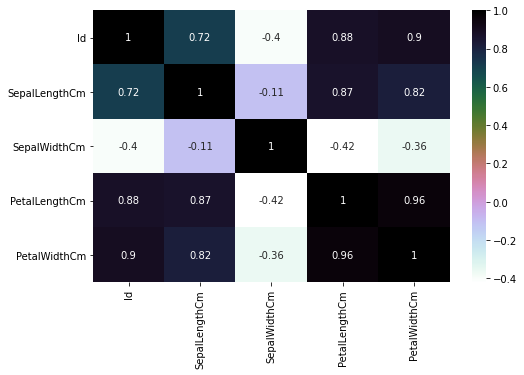

In [0]:
plt.figure(figsize=(8,5)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:241: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(-np.pi, np.pi))


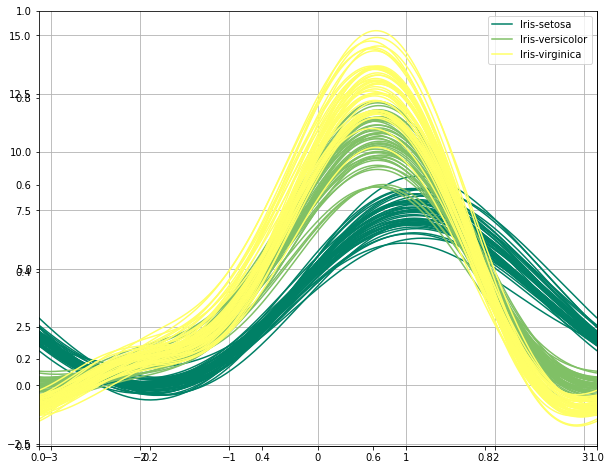

In [0]:
plt.subplots(figsize = (10,8))
from pandas import plotting

cmap = cm.get_cmap('summer') 
plotting.andrews_curves(iris.drop("Id", axis=1), "Species", colormap = cmap)
plt.show()

In [0]:
iris.drop('Id',axis=1, inplace=True) #
df_norm = iris[iris.columns[0:4]].apply(lambda x:(x - x.min())/(x.max() - x.min()))
df_norm.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
106,0.166667,0.208333,0.593220,0.666667
45,0.138889,0.416667,0.067797,0.083333
67,0.416667,0.291667,0.525424,0.375000
14,0.416667,0.833333,0.033898,0.041667
37,0.166667,0.458333,0.084746,0.000000


In [0]:
target = iris[['Species']].replace(iris['Species'].unique(), [0,1,2])
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
12,0.138889,0.416667,0.067797,0.000000,0
120,0.722222,0.500000,0.796610,0.916667,2
48,0.277778,0.708333,0.084746,0.041667,0
107,0.833333,0.375000,0.898305,0.708333,2
103,0.555556,0.375000,0.779661,0.708333,2


In [0]:
import keras

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler, LabelBinarizer

Using TensorFlow backend.


In [0]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [0]:
model = Sequential()
model.add(Dense( 12, input_dim=4, activation = 'relu'))
model.add(Dense( units = 15, activation= 'relu'))
model.add(Dense( units = 8, activation= 'relu'))
model.add(Dense( units = 10, activation= 'relu'))
model.add(Dense( units = 3, activation= 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 120, validation_data = (x_test, y_test))

Train on 120 samples, validate on 30 samples
Epoch 1/120
120/120 [==============================] - 0s 3ms/step - loss: 1.0874 - accuracy: 0.2917 - val_loss: 1.0963 - val_accuracy: 0.1667
Epoch 2/120
120/120 [==============================] - 0s 105us/step - loss: 1.0688 - accuracy: 0.3167 - val_loss: 1.0769 - val_accuracy: 0.2333
Epoch 3/120
120/120 [==============================] - 0s 92us/step - loss: 1.0468 - accuracy: 0.3167 - val_loss: 1.0571 - val_accuracy: 0.2667
Epoch 4/120
120/120 [==============================] - 0s 84us/step - loss: 1.0254 - accuracy: 0.3417 - val_loss: 1.0358 - val_accuracy: 0.3333
Epoch 5/120
120/120 [==============================] - 0s 82us/step - loss: 1.0019 - accuracy: 0.4250 - val_loss: 1.0137 - val_accuracy: 0.4667
Epoch 6/120
120/120 [==============================] - 0s 71us/step - loss: 0.9781 - accuracy: 0.6250 - val_loss: 0.9904 - val_accuracy: 0.6000
Epoch 7/120
120/120 [==============================] - 0s 82us/step - loss: 0.9523 - accura

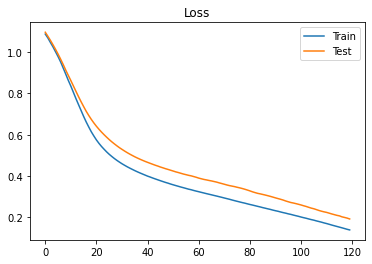

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()